In [2]:
import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np
import pandas as pd

In [3]:
PATH = '/home/katiez/ML/conditional_gan_microstructure/cGAN-Micro_Optimisation/trained_generators/microstructure/cgan_microstructure_22'
numbers = np.around(np.linspace(0,1,9),2)

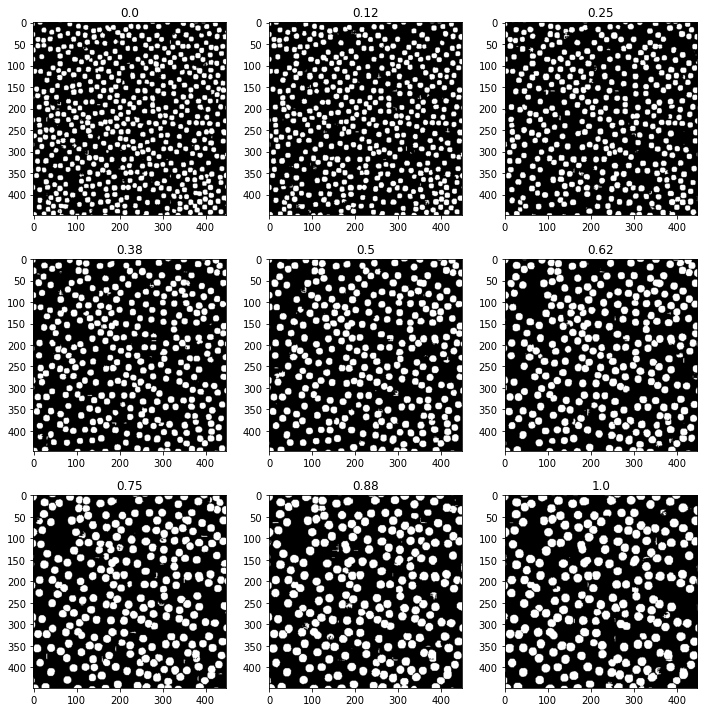

In [4]:
f, axarr = plt.subplots(3,3)
f.set_figheight(10)
f.set_figwidth(10)
for n, ax in zip(numbers, axarr.ravel()):
    im = tiff.imread(f'cgan_microstructure_22[{str(n)}].tif')
    ax.imshow(im,cmap='gray')
    ax.set_title(str(n))
plt.tight_layout()
#plt.savefig('middle_raw_seed16')
plt.show()

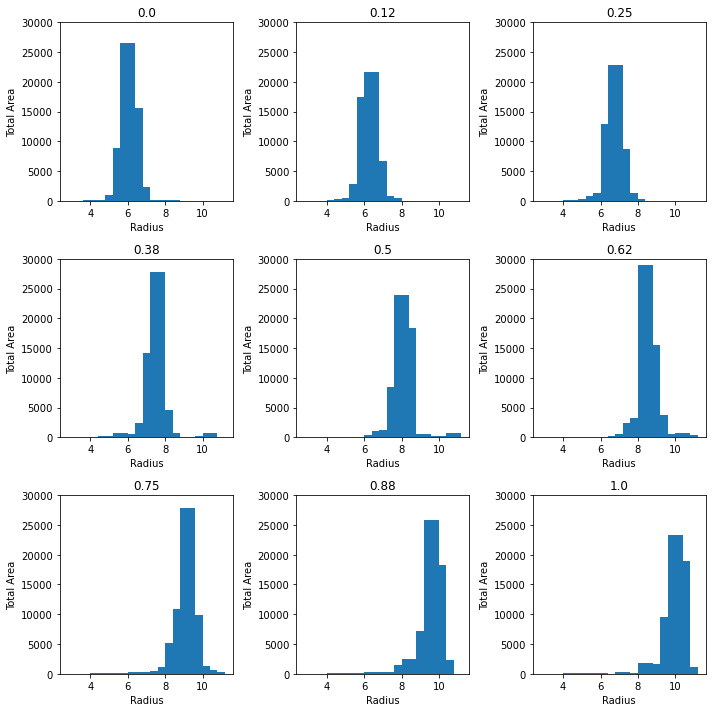

In [5]:
f, axarr = plt.subplots(3,3)
f.set_figheight(10)
f.set_figwidth(10)
for n, ax in zip(numbers, axarr.ravel()):
    df = pd.read_csv(PATH+f'/[{n}]/[{n}].csv')
    hist = np.histogram(df['radius'], bins=20, range=(3,11))
    freq = hist[0]
    edges = hist[1]
    bin_w = edges[-1]-edges[-2]
    middle_points = edges[:-1] + bin_w/2
    new_freq = np.round(freq * np.pi * middle_points**2, 0)
    ax.bar(middle_points, new_freq)
    ax.set_xlabel('Radius')
    ax.set_ylabel('Total Area')
    ax.set_ylim(0,30000)
    ax.set_title(str(n))
plt.tight_layout()
#plt.savefig('middle_radius_seed16')
plt.show()

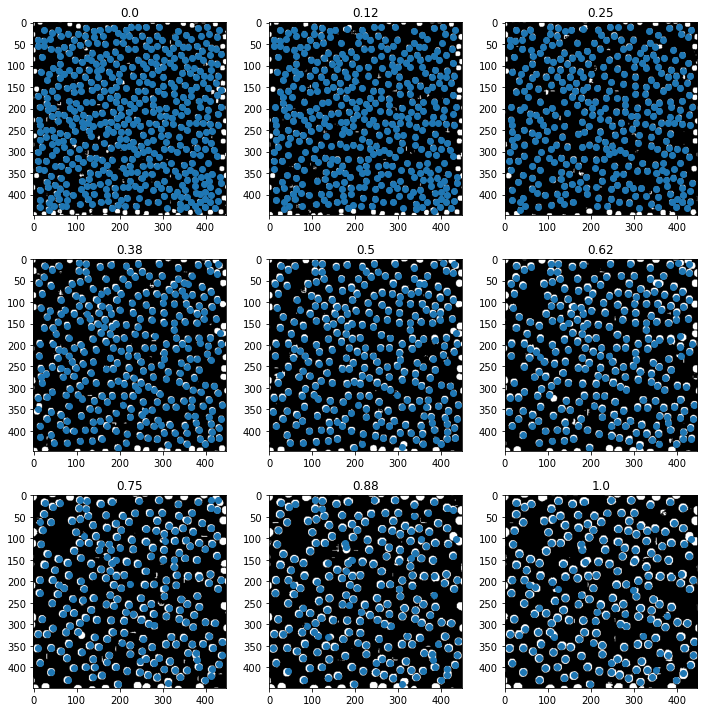

In [6]:
f, axarr = plt.subplots(3,3)
f.set_figheight(10)
f.set_figwidth(10)
for n, ax in zip(numbers, axarr.ravel()):
    df = pd.read_csv(PATH+f'/[{n}]/[{n}].csv')
    im = tiff.imread(f'cgan_microstructure_22[{str(n)}].tif')
    ax.imshow(im,cmap='gray')
    ax.plot(df['x'], df['y'], linestyle='', marker='o')
    #ax.set_ylim(0,40)
    ax.set_title(str(n))
plt.tight_layout()
#plt.savefig('middle_measure_seed16')
plt.show()